In [33]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,"/home/albert/Work/git/cmclimate")
import cmclimate
import os
%matplotlib inline
matplotlib.rcParams['figure.figsize']= (20, 8)
matplotlib.rcParams['xtick.labelsize']= 14
matplotlib.rcParams['ytick.labelsize']= 14
matplotlib.rcParams['axes.labelsize']= 16
import sys
sys.path.insert(0,"/home/albert/lib/python")
import numpy as np
import xarray as xr
import GriddedData
import time
import numpy.ma as ma


In [15]:
ds_hgradT_J=xr.open_mfdataset('/mnt/albert/equipes/meom/workdir/albert/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2013m01d??.1d_hgradT_filt-n80-f0.1.nc', concat_dim='time_counter')
ds_hgradS_J=xr.open_mfdataset('/mnt/albert/equipes/meom/workdir/albert/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2013m01d??.1d_hgradS_filt-n80-f0.1.nc', concat_dim='time_counter')
ds_hgradT_F=xr.open_mfdataset('/mnt/albert/equipes/meom/workdir/albert/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2013m02d??.1d_hgradT_filt-n80-f0.1.nc', concat_dim='time_counter')
ds_hgradS_F=xr.open_mfdataset('/mnt/albert/equipes/meom/workdir/albert/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2013m02d??.1d_hgradS_filt-n80-f0.1.nc', concat_dim='time_counter')
ds_hgradT_M=xr.open_mfdataset('/mnt/albert/equipes/meom/workdir/albert/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2013m03d??.1d_hgradT_filt-n80-f0.1.nc', concat_dim='time_counter')
ds_hgradS_M=xr.open_mfdataset('/mnt/albert/equipes/meom/workdir/albert/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2013m03d??.1d_hgradS_filt-n80-f0.1.nc', concat_dim='time_counter')

ds_hgradT_JFM=xr.merge([hgradT_J,hgradT_F,hgradT_M])
ds_hgradS_JFM=xr.merge([hgradS_J,hgradS_F,hgradS_M])


In [16]:
dirin="/mnt/albert/equipes/meom/MODEL_SET/NATL60/NATL60-I/"
gridfile=dirin+"NATL60_coordinates_v4.nc"
!ls $gridfile
grid=xr.open_dataset(gridfile)
navlat= grid['nav_lat']
navlon= grid['nav_lon']


/mnt/albert/equipes/meom/MODEL_SET/NATL60/NATL60-I/NATL60_coordinates_v4.nc


In [18]:
hgradT_JFM=ds_hgradT_JFM['vohgradb']
hgradS_JFM=ds_hgradS_JFM['vohgradb']


In [20]:
hgradT_JFM.shape

(90, 3454, 5422)

In [22]:
navlat2=np.array(navlat).squeeze()
navlon2=np.array(navlon).squeeze()
mgrd = GriddedData.grid2D(navlat=navlat2, navlon=navlon2)
crs = GriddedData.grdCoarsener(mgrd,crs_factor=60)
hgradT_JFM_m = hgradT_JFM.mean(axis=0,keep_attrs=True)
hgradT_JFM_mc = crs.return_ravel(np.asarray(hgradT_JFM_m))
hgradT_JFM_mcm = np.mean(hgradT_JFM_mc,axis=-3)
latcrs=crs.return_ravel(np.asarray(navlat2))
loncrs=crs.return_ravel(np.asarray(navlon2))
latcrsm=np.mean(latcrs,axis=-3)
loncrsm=np.mean(loncrs,axis=-3)


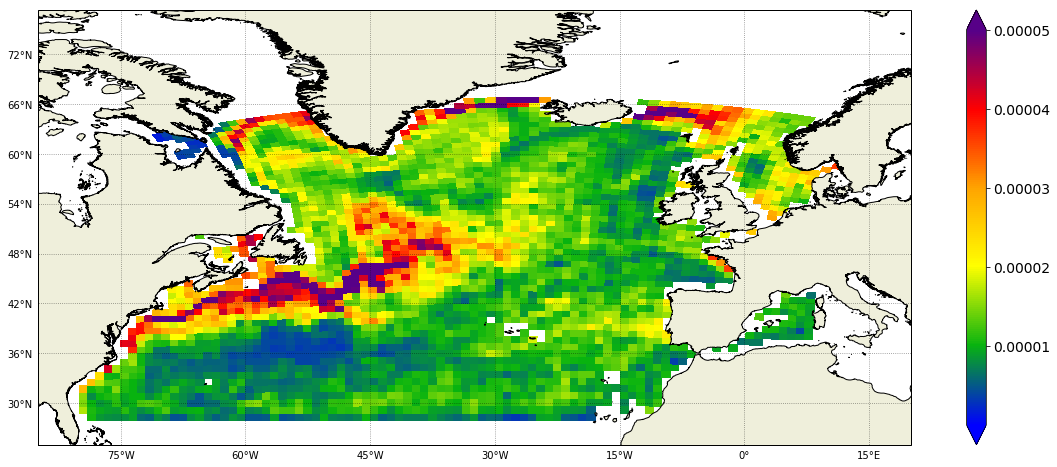

In [39]:
lon_min=-85
lon_max=20
lat_min=25
lat_max=70
scale='intermediate'
central_longitude=0.

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
extent = (lon_min, lon_max, lat_min, lat_max)

ax = plt.subplot(1, 1, 1,projection=ccrs.PlateCarree(central_longitude=central_longitude))
ax.set_extent(extent)
land = cfeature.GSHHSFeature(scale=scale,
                                 levels=[1],
                                 facecolor=cfeature.COLORS['land'])
ax.add_feature(land)
gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                      alpha=0.5)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

pcolor = ax.pcolormesh(loncrsm,latcrsm,ma.masked_invalid(hgradT_JFM_mcm),cmap=cmclimate.cm.BlGrYeOrReVi200,vmin=1e-9, vmax=5e-5)
cbar = plt.colorbar(pcolor,extend='both')

In [40]:
def plot_gradients(var,season,varname):
    var_m = var.mean(axis=0,keep_attrs=True)
    var_mc = crs.return_ravel(np.asarray(var_m))
    var_mcm = np.mean(var_mc,axis=-3)

    ax = plt.subplot(1, 1, 1,projection=ccrs.PlateCarree(central_longitude=central_longitude))
    ax.set_extent(extent)
    land = cfeature.GSHHSFeature(scale=scale,
                                 levels=[1],
                                 facecolor=cfeature.COLORS['land'])
    ax.add_feature(land)
    gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                      alpha=0.5)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

    pcolor = ax.pcolormesh(loncrsm,latcrsm,ma.masked_invalid(hgradT_JFM_mcm),cmap=cmclimate.cm.BlGrYeOrReVi200,vmin=1e-9, vmax=5e-5)
    cbar = plt.colorbar(pcolor,extend='both')
    plt.title('NATL60 horizontal gradients of '+varname+' '+season)
    plt.savefig('NATL60_TSG_'+varname+'_gradients_'+season+'_1x1.png', dpi=300, bbox_inches='tight')

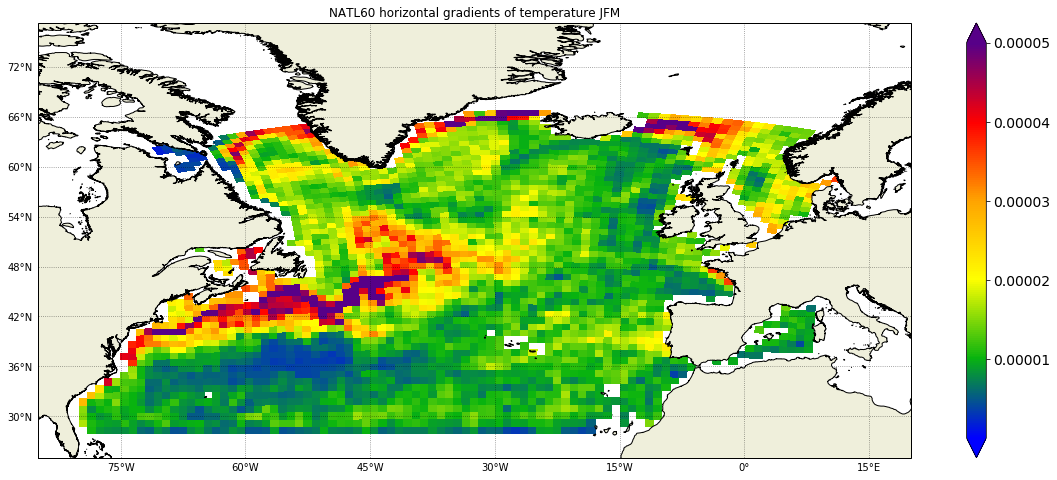

In [41]:
plot_gradients(hgradT_JFM,'JFM','temperature')

In [44]:
def binning_gradients(data, lon_res=0.05, lat_res=0.05, 
                            lon_min=0., lon_max=360., 
                            lat_min=-80., lat_max=80, 
                            min_nobs=100):
    # Define the latitudinal and longitudinal binning
    #lon_bins = np.arange(data['lon'].min().data
    #                     data['lon'].max().data, lon_res)
    lon_bins = np.arange(lon_min, lon_max, lon_res)
    lon_labels = lon_bins[:-1] - np.diff(lon_bins) / 2
    #lat_bins = np.arange(data['lat'].min().data,
    #                     data['lat'].max().data, lat_res)
    lat_bins = np.arange(lat_min, lat_max, lat_res)
    lat_labels = lat_bins[:-1] - np.diff(lat_bins) / 2
    mean_gradients = []
    total_nobs = []
    lat_values = []
    for i, ds in list(data.groupby_bins('nav_lat', lat_bins, 
                                        labels=lat_labels, 
                                        include_lowest=True)):
        try:
            group = ds.groupby_bins('nav_lon', lon_bins, 
                                    labels=lon_labels, 
                                    include_lowest=True)
            bins = group.median().sortby('lon_bins')
            nobs = group.count().sortby('lon_bins')
            mean_gradients.append(bins)
            total_nobs.append(nobs)
            lat_values.append(i)
        except (ValueError, StopIteration):
            dummy_array = xr.DataArray(np.full(len(lon_labels), 
                                               np.nan), 
                                       dims='lon_bins', 
                                       coords={'lon_bins': 
                                               ('lon_bins', lon_labels)
                                              }
                                      )
            mean_gradients.append(dummy_array)
            lat_values.append(i)
    res_bins = (xr.concat(mean_gradients, dim='nav_lat')
                  .assign_coords(lat=lat_values)
                  .rename({'lon_bins': 'nav_lon'})
                  .sortby('nav_lat')
               )
    res_obs = (xr.concat(total_nobs, dim='nav_lat')
                 .assign_coords(lat=lat_values)
                 .rename({'lon_bins': 'nav_lon'})
                 .sortby('nav_lat')
              )
    return xr.Dataset({data.name:res_bins, 'nobs':res_obs})

In [45]:
binned_temperature_gradients = binning_gradients(np.abs(hgradT_JFM), lon_res=1, lat_res=1)


KeyError: 'nav_lat'

In [56]:
lon_res=1
lat_res=1
lon_min=0.
lon_max=360.
lat_min=-80.
lat_max=80
min_nobs=100

data=ds_hgradT_JFM

In [47]:
lon_bins = np.arange(lon_min, lon_max, lon_res)
lon_labels = lon_bins[:-1] - np.diff(lon_bins) / 2
lat_bins = np.arange(lat_min, lat_max, lat_res)
lat_labels = lat_bins[:-1] - np.diff(lat_bins) / 2


In [48]:
mean_gradients = []
total_nobs = []
lat_values = []


In [57]:
data

<xarray.Dataset>
Dimensions:       (time_counter: 90, x: 5422, y: 3454)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2013-01-01T11:58:56 ...
Dimensions without coordinates: x, y
Data variables:
    nav_lon       (time_counter, y, x) float32 dask.array<shape=(90, 3454, 5422), chunksize=(1, 3454, 5422)>
    nav_lat       (time_counter, y, x) float32 dask.array<shape=(90, 3454, 5422), chunksize=(1, 3454, 5422)>
    vohgradb      (time_counter, y, x) float32 dask.array<shape=(90, 3454, 5422), chunksize=(1, 3454, 5422)>

In [58]:
list(data.groupby_bins('nav_lat', lat_bins,labels=lat_labels,include_lowest=True))

MemoryError: 